# Fuzzy C Means Clustering

In [38]:
import pandas as pd
from fcmeans import FCM
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [114]:
data = pd.read_csv('data_smk_indo.csv')
data

,Provinsi,Sekolah,Siswa Baru,Siswa,Mengulang,Putus Sekolah,Lulusan,KS dan Guru,Tng Kependidikan,Rombel,Ruang Kelas,Laboratorium,Perpustakaan,UKS
0,Aceh,217,18325,55508,652,258,17287,6728,1505,2518,2852,423,228,61
1,Bali,165,31243,97802,37,29,32904,6057,1375,3161,2948,264,164,86
2,Bangka Belitung,58,9242,26689,83,13,7468,1786,493,875,1038,140,55,31
3,Banten,727,83188,259900,632,339,84788,12999,2275,8663,9328,1196,678,210
4,Bengkulu,105,11213,32035,60,168,9122,3022,579,1299,1497,175,109,43
5,DI Yogyakarta,216,28920,88225,194,41,29497,7310,1752,3278,3447,496,233,169
6,DKI Jakarta,580,73979,224969,572,2066,73303,12725,2662,7164,8436,1128,598,322
7,Gorontalo,56,6453,19712,188,100,5593,1914,287,841,932,130,54,25
8,Jambi,176,18107,54319,328,94,16863,4446,897,2114,2345,289,185,70
9,Jawa Barat,2898,375863,1135305,2201,1659,357808,59518,11695,38134,40630,4782,2747,991


## Dataset Info

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Provinsi          34 non-null     object
 1   Sekolah           34 non-null     int64 
 2   Siswa Baru        34 non-null     int64 
 3   Siswa             34 non-null     int64 
 4   Mengulang         34 non-null     int64 
 5   Putus Sekolah     34 non-null     int64 
 6   Lulusan           34 non-null     int64 
 7   KS dan Guru       34 non-null     int64 
 8   Tng Kependidikan  34 non-null     int64 
 9   Rombel            34 non-null     int64 
 10  Ruang Kelas       34 non-null     int64 
 11  Laboratorium      34 non-null     int64 
 12  Perpustakaan      34 non-null     int64 
 13  UKS               34 non-null     int64 
dtypes: int64(13), object(1)
memory usage: 3.8+ KB


In [41]:
data.shape

(34, 14)

In [44]:
data.isnull().sum()

Provinsi            0
Sekolah             0
Siswa Baru          0
Siswa               0
Mengulang           0
Putus Sekolah       0
Lulusan             0
KS dan Guru         0
Tng Kependidikan    0
Rombel              0
Ruang Kelas         0
Laboratorium        0
Perpustakaan        0
UKS                 0
dtype: int64

In [43]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sekolah,34.0,414.029412,615.802481,29.0,133.50,197.5,311.25,2898.0
Siswa Baru,34.0,51577.058824,83851.322452,3524.0,11780.25,23158.0,40422.25,375863.0
Siswa,34.0,154659.588235,252326.022314,10066.0,34291.25,69340.0,120237.25,1135305.0
Mengulang,34.0,483.264706,580.241867,10.0,165.50,268.5,566.50,2697.0
Putus Sekolah,34.0,410.323529,653.225365,13.0,99.25,166.0,330.25,3024.0
Lulusan,34.0,48008.000000,79416.258442,2888.0,10081.50,20180.5,36169.50,357808.0
KS dan Guru,34.0,9881.764706,13802.389273,877.0,3031.25,4822.5,8155.75,59518.0
Tng Kependidikan,34.0,1757.205882,2680.324582,116.0,486.75,864.5,1552.25,11695.0
Rombel,34.0,5453.617647,8471.580798,367.0,1346.50,2608.0,4141.00,38134.0
Ruang Kelas,34.0,5780.264706,8789.121093,442.0,1531.75,2780.5,4382.75,40630.0


In [116]:
data2 = data
prov = data2.Provinsi

In [117]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(data2['Provinsi'])
le.transform(data2['Provinsi'])
data2['Provinsi'] = le.transform(data2['Provinsi'])

In [118]:
data2 = data2.drop(['Provinsi'], axis='columns')

In [119]:
columns = data2.columns
columns

Index(['Sekolah', 'Siswa Baru', 'Siswa', 'Mengulang', 'Putus Sekolah',
       'Lulusan', 'KS dan Guru', 'Tng Kependidikan', 'Rombel', 'Ruang Kelas',
       'Laboratorium', 'Perpustakaan', 'UKS'],
      dtype='object')

In [120]:
data2

,Sekolah,Siswa Baru,Siswa,Mengulang,Putus Sekolah,Lulusan,KS dan Guru,Tng Kependidikan,Rombel,Ruang Kelas,Laboratorium,Perpustakaan,UKS
0,217,18325,55508,652,258,17287,6728,1505,2518,2852,423,228,61
1,165,31243,97802,37,29,32904,6057,1375,3161,2948,264,164,86
2,58,9242,26689,83,13,7468,1786,493,875,1038,140,55,31
3,727,83188,259900,632,339,84788,12999,2275,8663,9328,1196,678,210
4,105,11213,32035,60,168,9122,3022,579,1299,1497,175,109,43
5,216,28920,88225,194,41,29497,7310,1752,3278,3447,496,233,169
6,580,73979,224969,572,2066,73303,12725,2662,7164,8436,1128,598,322
7,56,6453,19712,188,100,5593,1914,287,841,932,130,54,25
8,176,18107,54319,328,94,16863,4446,897,2114,2345,289,185,70
9,2898,375863,1135305,2201,1659,357808,59518,11695,38134,40630,4782,2747,991


In [121]:
data.shape

(34, 14)

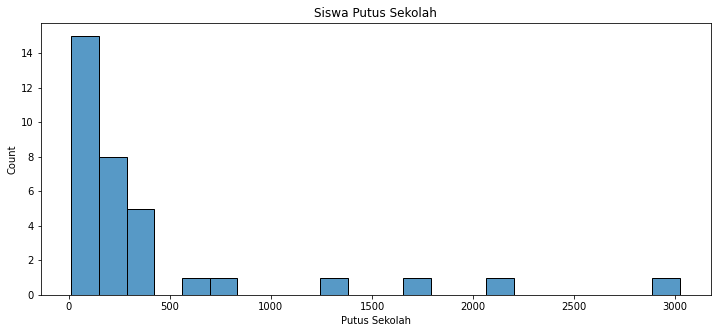

In [122]:
plt.figure(figsize=(12,5))
plt.title("Siswa Putus Sekolah")
ax = sns.histplot(data2["Putus Sekolah"])

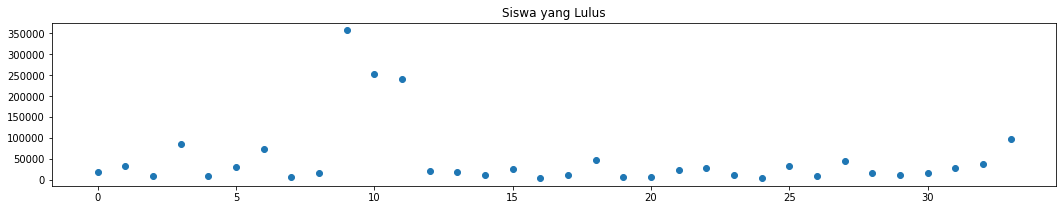

In [123]:
plt.figure(figsize=(18,3))
plt.title('Siswa yang Lulus')
plt.scatter(data['Provinsi'], data['Lulusan'])
plt.show()

<AxesSubplot:>

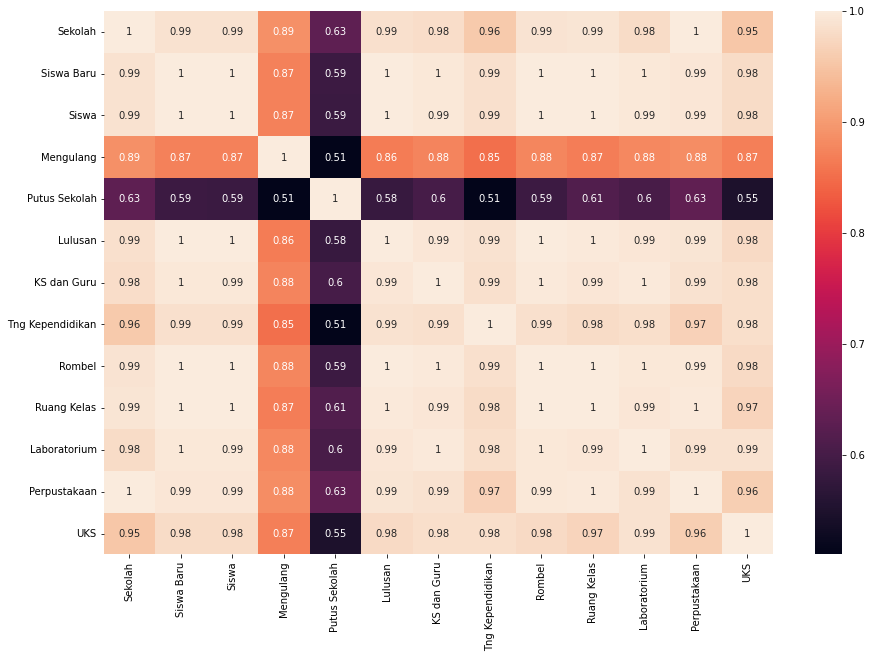

In [124]:
plt.figure(figsize=(15,10))
sns.heatmap(data2.corr( ),annot=True)

## Scaling

In [125]:
data2.head(3)

,Sekolah,Siswa Baru,Siswa,Mengulang,Putus Sekolah,Lulusan,KS dan Guru,Tng Kependidikan,Rombel,Ruang Kelas,Laboratorium,Perpustakaan,UKS
0,217,18325,55508,652,258,17287,6728,1505,2518,2852,423,228,61
1,165,31243,97802,37,29,32904,6057,1375,3161,2948,264,164,86
2,58,9242,26689,83,13,7468,1786,493,875,1038,140,55,31


In [126]:
from sklearn.preprocessing import StandardScaler

scalarModel = StandardScaler()
data_s = scalarModel.fit_transform(data2)

In [127]:
data_s

array([[-3.24767165e-01, -4.02523381e-01, -3.98859667e-01,
         2.95174855e-01, -2.36693560e-01, -3.92652543e-01,
        -2.31930308e-01, -9.55103223e-02, -3.51736567e-01,
        -3.38179575e-01, -2.95087850e-01, -2.92379237e-01,
        -3.92100803e-01],
       [-4.10479712e-01, -2.46148191e-01, -2.28722496e-01,
        -7.80667262e-01, -5.92533696e-01, -1.93047883e-01,
        -2.81276170e-01, -1.44741299e-01, -2.74694309e-01,
        -3.27092722e-01, -4.35848895e-01, -4.02527647e-01,
        -2.95243586e-01],
       [-5.86849759e-01, -5.12475066e-01, -5.14790606e-01,
        -7.00197770e-01, -6.17395889e-01, -5.18151561e-01,
        -5.95368831e-01, -4.78754541e-01, -5.48595713e-01,
        -5.47674894e-01, -5.45624804e-01, -5.90124159e-01,
        -5.08329463e-01],
       [ 5.15875117e-01,  3.82657296e-01,  4.23353335e-01,
         2.60188120e-01, -1.10828709e-01,  4.70094090e-01,
         2.29243907e-01,  1.96088539e-01,  3.84538202e-01,
         4.09721024e-01,  3.89241002e

In [128]:
data3 = pd.DataFrame(data_s , columns = columns )
data3

,Sekolah,Siswa Baru,Siswa,Mengulang,Putus Sekolah,Lulusan,KS dan Guru,Tng Kependidikan,Rombel,Ruang Kelas,Laboratorium,Perpustakaan,UKS
0,-0.324767,-0.402523,-0.398860,0.295175,-0.236694,-0.392653,-0.231930,-0.095510,-0.351737,-0.338180,-0.295088,-0.292379,-0.392101
1,-0.410480,-0.246148,-0.228722,-0.780667,-0.592534,-0.193048,-0.281276,-0.144741,-0.274694,-0.327093,-0.435849,-0.402528,-0.295244
2,-0.586850,-0.512475,-0.514791,-0.700198,-0.617396,-0.518152,-0.595369,-0.478755,-0.548596,-0.547675,-0.545625,-0.590124,-0.508329
3,0.515875,0.382657,0.423353,0.260188,-0.110829,0.470094,0.229244,0.196089,0.384538,0.409721,0.389241,0.482102,0.185168
4,-0.509379,-0.488616,-0.493285,-0.740433,-0.376543,-0.497011,-0.504472,-0.446186,-0.497793,-0.494666,-0.514640,-0.497186,-0.461838
5,-0.326415,-0.274269,-0.267248,-0.506021,-0.573887,-0.236594,-0.189130,-0.001971,-0.260676,-0.269464,-0.230462,-0.283774,0.026322
6,0.273572,0.271180,0.282835,0.155228,2.572734,0.323302,0.209094,0.342645,0.204933,0.306706,0.329041,0.344416,0.619089
7,-0.590146,-0.546237,-0.542857,-0.516517,-0.482208,-0.542116,-0.585956,-0.556767,-0.552669,-0.559917,-0.554478,-0.591845,-0.531575
8,-0.392348,-0.405162,-0.403643,-0.271610,-0.491531,-0.398072,-0.399750,-0.325760,-0.400143,-0.396732,-0.413717,-0.366385,-0.357232
9,4.094374,3.925552,3.944868,3.004898,1.940302,3.959629,3.650287,3.763441,3.915662,4.024728,3.563889,4.042993,3.210988


In [129]:
data3 = data3.values
data3

array([[-3.24767165e-01, -4.02523381e-01, -3.98859667e-01,
         2.95174855e-01, -2.36693560e-01, -3.92652543e-01,
        -2.31930308e-01, -9.55103223e-02, -3.51736567e-01,
        -3.38179575e-01, -2.95087850e-01, -2.92379237e-01,
        -3.92100803e-01],
       [-4.10479712e-01, -2.46148191e-01, -2.28722496e-01,
        -7.80667262e-01, -5.92533696e-01, -1.93047883e-01,
        -2.81276170e-01, -1.44741299e-01, -2.74694309e-01,
        -3.27092722e-01, -4.35848895e-01, -4.02527647e-01,
        -2.95243586e-01],
       [-5.86849759e-01, -5.12475066e-01, -5.14790606e-01,
        -7.00197770e-01, -6.17395889e-01, -5.18151561e-01,
        -5.95368831e-01, -4.78754541e-01, -5.48595713e-01,
        -5.47674894e-01, -5.45624804e-01, -5.90124159e-01,
        -5.08329463e-01],
       [ 5.15875117e-01,  3.82657296e-01,  4.23353335e-01,
         2.60188120e-01, -1.10828709e-01,  4.70094090e-01,
         2.29243907e-01,  1.96088539e-01,  3.84538202e-01,
         4.09721024e-01,  3.89241002e

## Implementasi Fuzzy C Means

In [130]:
fcmModel = FCM(n_clusters = 3)
fcmModel.fit(data3)
center = fcmModel.centers
center

array([[ 0.55549597,  0.45260525,  0.45071239,  0.15990753,  2.81997742,
         0.45560395,  0.48631605,  0.25451323,  0.43170352,  0.53676959,
         0.53427587,  0.58869469,  0.44829053],
       [-0.37463555, -0.37333654, -0.37339489, -0.33079254, -0.37716131,
        -0.37404105, -0.37732889, -0.35773128, -0.37285853, -0.37736504,
        -0.38414848, -0.37883142, -0.37377266],
       [ 2.93892324,  3.02350659,  3.02046855,  2.81602834,  1.25026608,
         3.01391605,  3.02325475,  3.04875998,  3.02608944,  2.97801189,
         3.03980436,  2.95478452,  3.08248333]])

In [32]:
# pred = fcmModel.predict(data3)
# print('Predicted Value for fcmModel is : ' , pred)
# pred.shape

Predicted Value for fcmModel is :  [2 0 2 0 2 0 2 1 1 1 2 2 1 2 2 1 2 2 2 2 2 1 2 1 1 1 1 1 1 2 1 1 1 1]


(34,)

In [131]:
pred = fcmModel.predict(data3)
print('Predicted Value for fcmModel is : ' , pred)
pred.shape

Predicted Value for fcmModel is :  [1 1 1 1 1 1 0 1 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]


(34,)

In [132]:
data3 = pd.DataFrame(data3 , columns = columns )
data3

,Sekolah,Siswa Baru,Siswa,Mengulang,Putus Sekolah,Lulusan,KS dan Guru,Tng Kependidikan,Rombel,Ruang Kelas,Laboratorium,Perpustakaan,UKS
0,-0.324767,-0.402523,-0.398860,0.295175,-0.236694,-0.392653,-0.231930,-0.095510,-0.351737,-0.338180,-0.295088,-0.292379,-0.392101
1,-0.410480,-0.246148,-0.228722,-0.780667,-0.592534,-0.193048,-0.281276,-0.144741,-0.274694,-0.327093,-0.435849,-0.402528,-0.295244
2,-0.586850,-0.512475,-0.514791,-0.700198,-0.617396,-0.518152,-0.595369,-0.478755,-0.548596,-0.547675,-0.545625,-0.590124,-0.508329
3,0.515875,0.382657,0.423353,0.260188,-0.110829,0.470094,0.229244,0.196089,0.384538,0.409721,0.389241,0.482102,0.185168
4,-0.509379,-0.488616,-0.493285,-0.740433,-0.376543,-0.497011,-0.504472,-0.446186,-0.497793,-0.494666,-0.514640,-0.497186,-0.461838
5,-0.326415,-0.274269,-0.267248,-0.506021,-0.573887,-0.236594,-0.189130,-0.001971,-0.260676,-0.269464,-0.230462,-0.283774,0.026322
6,0.273572,0.271180,0.282835,0.155228,2.572734,0.323302,0.209094,0.342645,0.204933,0.306706,0.329041,0.344416,0.619089
7,-0.590146,-0.546237,-0.542857,-0.516517,-0.482208,-0.542116,-0.585956,-0.556767,-0.552669,-0.559917,-0.554478,-0.591845,-0.531575
8,-0.392348,-0.405162,-0.403643,-0.271610,-0.491531,-0.398072,-0.399750,-0.325760,-0.400143,-0.396732,-0.413717,-0.366385,-0.357232
9,4.094374,3.925552,3.944868,3.004898,1.940302,3.959629,3.650287,3.763441,3.915662,4.024728,3.563889,4.042993,3.210988


In [134]:
data3['cluster'] = pred
data3

,Sekolah,Siswa Baru,Siswa,Mengulang,Putus Sekolah,Lulusan,KS dan Guru,Tng Kependidikan,Rombel,Ruang Kelas,Laboratorium,Perpustakaan,UKS,cluster
0,-0.324767,-0.402523,-0.398860,0.295175,-0.236694,-0.392653,-0.231930,-0.095510,-0.351737,-0.338180,-0.295088,-0.292379,-0.392101,1
1,-0.410480,-0.246148,-0.228722,-0.780667,-0.592534,-0.193048,-0.281276,-0.144741,-0.274694,-0.327093,-0.435849,-0.402528,-0.295244,1
2,-0.586850,-0.512475,-0.514791,-0.700198,-0.617396,-0.518152,-0.595369,-0.478755,-0.548596,-0.547675,-0.545625,-0.590124,-0.508329,1
3,0.515875,0.382657,0.423353,0.260188,-0.110829,0.470094,0.229244,0.196089,0.384538,0.409721,0.389241,0.482102,0.185168,1
4,-0.509379,-0.488616,-0.493285,-0.740433,-0.376543,-0.497011,-0.504472,-0.446186,-0.497793,-0.494666,-0.514640,-0.497186,-0.461838,1
5,-0.326415,-0.274269,-0.267248,-0.506021,-0.573887,-0.236594,-0.189130,-0.001971,-0.260676,-0.269464,-0.230462,-0.283774,0.026322,1
6,0.273572,0.271180,0.282835,0.155228,2.572734,0.323302,0.209094,0.342645,0.204933,0.306706,0.329041,0.344416,0.619089,0
7,-0.590146,-0.546237,-0.542857,-0.516517,-0.482208,-0.542116,-0.585956,-0.556767,-0.552669,-0.559917,-0.554478,-0.591845,-0.531575,1
8,-0.392348,-0.405162,-0.403643,-0.271610,-0.491531,-0.398072,-0.399750,-0.325760,-0.400143,-0.396732,-0.413717,-0.366385,-0.357232,1
9,4.094374,3.925552,3.944868,3.004898,1.940302,3.959629,3.650287,3.763441,3.915662,4.024728,3.563889,4.042993,3.210988,2


In [135]:
data4 = data3.values
data4

array([[-3.24767165e-01, -4.02523381e-01, -3.98859667e-01,
         2.95174855e-01, -2.36693560e-01, -3.92652543e-01,
        -2.31930308e-01, -9.55103223e-02, -3.51736567e-01,
        -3.38179575e-01, -2.95087850e-01, -2.92379237e-01,
        -3.92100803e-01,  1.00000000e+00],
       [-4.10479712e-01, -2.46148191e-01, -2.28722496e-01,
        -7.80667262e-01, -5.92533696e-01, -1.93047883e-01,
        -2.81276170e-01, -1.44741299e-01, -2.74694309e-01,
        -3.27092722e-01, -4.35848895e-01, -4.02527647e-01,
        -2.95243586e-01,  1.00000000e+00],
       [-5.86849759e-01, -5.12475066e-01, -5.14790606e-01,
        -7.00197770e-01, -6.17395889e-01, -5.18151561e-01,
        -5.95368831e-01, -4.78754541e-01, -5.48595713e-01,
        -5.47674894e-01, -5.45624804e-01, -5.90124159e-01,
        -5.08329463e-01,  1.00000000e+00],
       [ 5.15875117e-01,  3.82657296e-01,  4.23353335e-01,
         2.60188120e-01, -1.10828709e-01,  4.70094090e-01,
         2.29243907e-01,  1.96088539e-01,  3.

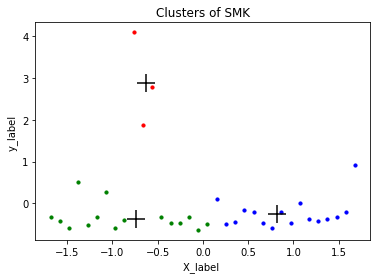

In [37]:
# # Visualising the clusters
# plt.scatter(data3[pred == 0, 0], data3[pred == 0, 1], s = 10, c = 'r')
# plt.scatter(data3[pred == 1, 0], data3[pred == 1, 1], s = 10, c = 'b' )
# plt.scatter(data3[pred == 2, 0], data3[pred == 2, 1], s = 10, c = 'g' )
# plt.scatter(center[:, 0], center[:, 1], s = 300, c = 'black',marker = '+')
# plt.title('Clusters of SMK')
# plt.xlabel('X_label ')
# plt.ylabel('y_label ')
# # plt.legend()
# plt.show()

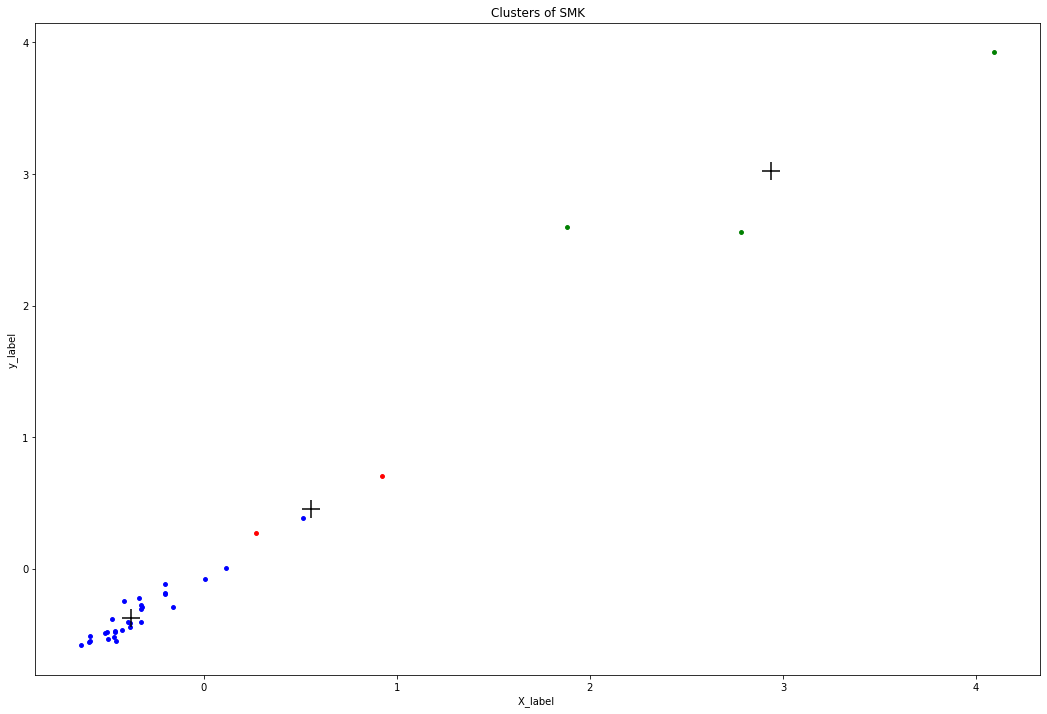

In [153]:
# Visualising the clusters
plt.figure(figsize=(18,12))
plt.scatter(data4[pred == 0, 0], data4[pred == 0, 1], s = 15, c = 'r')
plt.scatter(data4[pred == 1, 0], data4[pred == 1, 1], s = 15, c = 'b' )
plt.scatter(data4[pred == 2, 0], data4[pred == 2, 1], s = 15, c = 'g' )
plt.scatter(center[:, 0], center[:, 1], s = 300, c = 'black',marker = '+')
plt.title('Clusters of SMK')
plt.xlabel('X_label ')
plt.ylabel('y_label ')
# plt.legend()
plt.show()

In [156]:
data_f = data3

In [157]:
data_f.head(2)

,Sekolah,Siswa Baru,Siswa,Mengulang,Putus Sekolah,Lulusan,KS dan Guru,Tng Kependidikan,Rombel,Ruang Kelas,Laboratorium,Perpustakaan,UKS,cluster,Provinsi
0,-0.324767,-0.402523,-0.398860,0.295175,-0.236694,-0.392653,-0.231930,-0.095510,-0.351737,-0.338180,-0.295088,-0.292379,-0.392101,1,Aceh
1,-0.410480,-0.246148,-0.228722,-0.780667,-0.592534,-0.193048,-0.281276,-0.144741,-0.274694,-0.327093,-0.435849,-0.402528,-0.295244,1,Bali


In [158]:
data_ff = data_f[['cluster', 'Provinsi']]
data_ff

,cluster,Provinsi
0,1,Aceh
1,1,Bali
2,1,Bangka Belitung
3,1,Banten
4,1,Bengkulu
5,1,DI Yogyakarta
6,0,DKI Jakarta
7,1,Gorontalo
8,1,Jambi
9,2,Jawa Barat
